### PREDICTIVE MODELS AND RISK EVALUATIONS (PART1)

### IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import yfinance as yf

#### 1. Data mining from yfinance Api

In [2]:
#^NSEBANK 10 year chart
nsebank = yf.download('^NSEBANK', period='10y')

[*********************100%***********************]  1 of 1 completed


#### 2. Price Chart

In [3]:
nsebank

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-03-18 00:00:00+05:30,11679.349609,11810.400391,11625.599609,11735.500000,11735.363281,0
2013-03-19 00:00:00+05:30,11796.200195,11814.750000,11416.750000,11508.049805,11507.916016,0
2013-03-20 00:00:00+05:30,11491.799805,11491.799805,11231.750000,11254.849609,11254.718750,0
2013-03-21 00:00:00+05:30,11285.650391,11512.099609,11209.650391,11238.349609,11238.218750,0
2013-03-22 00:00:00+05:30,11275.450195,11331.200195,11173.349609,11204.049805,11203.919922,0
...,...,...,...,...,...,...
2023-03-13 00:00:00+05:30,40356.101562,40690.050781,39454.601562,39564.699219,39564.699219,174500
2023-03-14 00:00:00+05:30,39522.398438,39768.500000,39132.601562,39411.398438,39411.398438,205700
2023-03-15 00:00:00+05:30,39777.898438,39914.101562,38934.648438,39051.500000,39051.500000,164300


#### 3. Attributes of Data Frame

In [4]:
nsebank.index

DatetimeIndex(['2013-03-18 00:00:00+05:30', '2013-03-19 00:00:00+05:30',
               '2013-03-20 00:00:00+05:30', '2013-03-21 00:00:00+05:30',
               '2013-03-22 00:00:00+05:30', '2013-03-25 00:00:00+05:30',
               '2013-03-26 00:00:00+05:30', '2013-03-28 00:00:00+05:30',
               '2013-04-01 00:00:00+05:30', '2013-04-02 00:00:00+05:30',
               ...
               '2023-03-03 00:00:00+05:30', '2023-03-06 00:00:00+05:30',
               '2023-03-08 00:00:00+05:30', '2023-03-09 00:00:00+05:30',
               '2023-03-10 00:00:00+05:30', '2023-03-13 00:00:00+05:30',
               '2023-03-14 00:00:00+05:30', '2023-03-15 00:00:00+05:30',
               '2023-03-16 00:00:00+05:30', '2023-03-17 00:00:00+05:30'],
              dtype='datetime64[ns, Asia/Kolkata]', name='Date', length=2183, freq=None)

In [5]:
#initial date
nsebank.index[0]

Timestamp('2013-03-18 00:00:00+0530', tz='Asia/Kolkata')

In [6]:
#final date
nsebank.index[-1]

Timestamp('2023-03-17 00:00:00+0530', tz='Asia/Kolkata')

In [7]:
#Size of dataset
#rows and columns
nsebank.shape

(2183, 6)

2497 number of observations & 6 number of variables

### 4. Methods of DataFrame

In [8]:
#print five recent chart
nsebank.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-13 00:00:00+05:30,40356.101562,40690.050781,39454.601562,39564.699219,39564.699219,174500
2023-03-14 00:00:00+05:30,39522.398438,39768.500000,39132.601562,39411.398438,39411.398438,205700
2023-03-15 00:00:00+05:30,39777.898438,39914.101562,38934.648438,39051.500000,39051.500000,164300
2023-03-16 00:00:00+05:30,39061.699219,39381.398438,38613.148438,39132.601562,39132.601562,196300
2023-03-17 00:00:00+05:30,39442.398438,39705.148438,38926.800781,39598.101562,39598.101562,173400


In [9]:
#print five last chart
nsebank.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-03-18 00:00:00+05:30,11679.349609,11810.400391,11625.599609,11735.500000,11735.363281,0
2013-03-19 00:00:00+05:30,11796.200195,11814.750000,11416.750000,11508.049805,11507.916016,0
2013-03-20 00:00:00+05:30,11491.799805,11491.799805,11231.750000,11254.849609,11254.718750,0
2013-03-21 00:00:00+05:30,11285.650391,11512.099609,11209.650391,11238.349609,11238.218750,0
2013-03-22 00:00:00+05:30,11275.450195,11331.200195,11173.349609,11204.049805,11203.919922,0


### 5. Summary Statistics 

In [10]:
nsebank.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2183.000000,2183.000000,2183.000000,2183.000000,2183.000000,2.183000e+03
mean,25320.580022,25515.061565,25088.207295,25303.550891,25303.268457,1.055314e+06
std,8934.436901,8982.187021,8872.476207,8930.220997,8930.138133,3.885834e+07
min,8688.650391,8869.700195,8366.750000,8664.200195,8664.099609,0.000000e+00
25%,18382.775391,18532.450195,18222.950195,18368.525391,18368.312500,0.000000e+00
50%,25281.000000,25425.500000,25058.750000,25284.599609,25284.306641,0.000000e+00
75%,32083.350586,32191.750000,31803.875000,32006.575195,32006.203125,1.294500e+05
max,44078.601562,44151.800781,43987.949219,44049.101562,44048.589844,1.798102e+09


### 6. Slicing DataFrame

Selection by label :   loc

Selection by position: .iloc

In [11]:
nsebank[:5]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-03-18 00:00:00+05:30,11679.349609,11810.400391,11625.599609,11735.500000,11735.363281,0
2013-03-19 00:00:00+05:30,11796.200195,11814.750000,11416.750000,11508.049805,11507.916016,0
2013-03-20 00:00:00+05:30,11491.799805,11491.799805,11231.750000,11254.849609,11254.718750,0
2013-03-21 00:00:00+05:30,11285.650391,11512.099609,11209.650391,11238.349609,11238.218750,0
2013-03-22 00:00:00+05:30,11275.450195,11331.200195,11173.349609,11204.049805,11203.919922,0


#### Example of loc

In [12]:
# Access the row with the index '2013-04-29'
row = nsebank.loc['2013-04-29']

# Access the value of the 'Open' column for the row with the index '2013-04-29'
value = nsebank.loc['2013-04-29', 'Open']

In [13]:
row

Open         12533.150391
High         12661.250000
Low          12508.400391
Close        12609.150391
Adj Close    12609.003906
Volume           0.000000
Name: 2013-04-29 00:00:00+05:30, dtype: float64

In [14]:
value

12533.150390625

In [15]:
# Access the value of the 'Open' column for the row with the index '2013-04-29' to '2023-01-24'
value = nsebank.loc['2013-04-29':'2023-01-24', 'Open']

In [16]:
value.head()

Date
2013-04-29 00:00:00+05:30    12533.150391
2013-04-30 00:00:00+05:30    12609.150391
2013-05-02 00:00:00+05:30    12561.549805
2013-05-03 00:00:00+05:30    12709.950195
2013-05-06 00:00:00+05:30    12393.599609
Name: Open, dtype: float64

In [17]:
value.shape

(2121,)

#### Example of iloc

In [18]:
# Access the first row of the DataFrame
first_row = nsebank.iloc[0]

# Access the first value of the first row
first_value = nsebank.iloc[0, 0]

In [19]:
first_row

Open         11679.349609
High         11810.400391
Low          11625.599609
Close        11735.500000
Adj Close    11735.363281
Volume           0.000000
Name: 2013-03-18 00:00:00+05:30, dtype: float64

In [20]:
first_value

11679.349609375

In [21]:
#slicing entire row from dataset and only printing final price with entire columns
first_column = nsebank.iloc[2146:2147, :]
first_column

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-24 00:00:00+05:30,42994.449219,43078.898438,42615.648438,42733.449219,42733.449219,159500


### 7. Usage of loc in data visualisation 

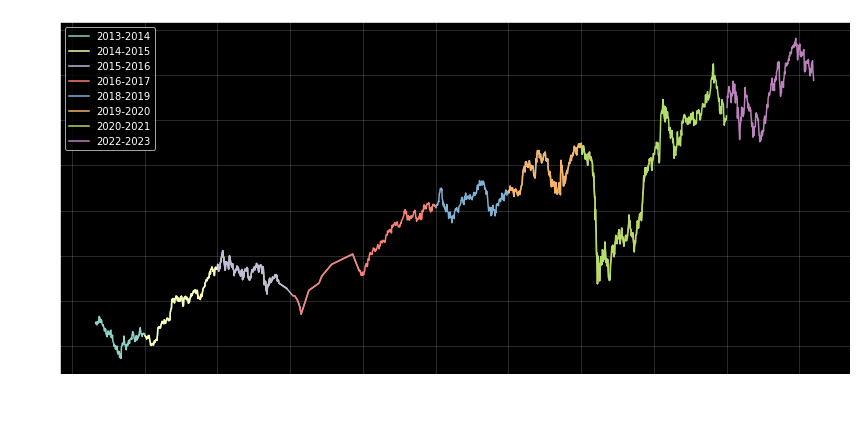

In [22]:
plt.style.use('dark_background')

plt.figure(figsize=(12, 6))
nsebank.loc['2013-04-29':'2014-12-31', 'Close'].plot(label='2013-2014')
nsebank.loc['2014-01-01':'2015-12-31', 'Close'].plot(label='2014-2015')
nsebank.loc['2015-01-01':'2016-12-31', 'Close'].plot(label='2015-2016')
nsebank.loc['2016-01-01':'2017-12-31', 'Close'].plot(label='2016-2017')
nsebank.loc['2018-01-01':'2019-12-31', 'Close'].plot(label='2018-2019')
nsebank.loc['2019-01-01':'2020-12-31', 'Close'].plot(label='2019-2020')
nsebank.loc['2020-01-01':'2021-12-31', 'Close'].plot(label='2020-2021')
nsebank.loc['2022-01-01':'2023-03-14', 'Close'].plot(label='2022-2023')
plt.xlabel('Date')
plt.ylabel('Price (₹)')
plt.title('NSEBANK')
plt.legend()
plt.grid(color='white', alpha=0.20)
plt.tight_layout()
plt.show()

### 8. Generate New Variable in DataFrame

1. Price Difference: Price difference is the difference in price between two consecutive time periods. For example, if the stock price was ₹100 yesterday and ₹105 today, the price difference would be ₹5.

2. Daily Return: Daily return is a measure of the percentage change in price from one day to the next. It is calculated as the price difference divided by the previous day's price. In the example above, the daily return would be (105-100)/100 = 0.05 or 5%.

3. Direction: Direction refers to the direction in which the stock price is moving, either upward or downward. If the price difference is positive, the direction is upward, and if the price difference is negative, the direction is downward.

4. Moving Average: Moving average is a technical indicator that is used to identify trends in stock prices. It is calculated by taking the average of a set number of consecutive closing prices. For example, a 40-day moving average would be the average of the last 40 closing prices. Moving averages are often used to smooth out short-term fluctuations in the stock price and provide a clearer picture of the long-term trend. A rising moving average indicates that the stock price is trending upward, while a falling moving average indicates that the stock price is trending downward.

#### 1. Price shifting

In [23]:
nsebank['Price_shift_1'] = nsebank['Close'].shift(-1)

#### 2. Price Difference

In [24]:
nsebank['PriceDiff'] = nsebank["Price_shift_1"] - nsebank['Close']

In [25]:
nsebank.tail(10)

,Open,High,Low,Close,Adj Close,Volume,Price_shift_1,PriceDiff
Date,,,,,,,,
2023-03-03 00:00:00+05:30,40671.398438,41390.148438,40605.351562,41251.351562,41251.351562,213800,41350.398438,99.046875
2023-03-06 00:00:00+05:30,41418.398438,41671.199219,41259.148438,41350.398438,41350.398438,180200,41577.101562,226.703125
2023-03-08 00:00:00+05:30,41178.351562,41625.351562,41100.351562,41577.101562,41577.101562,157600,41256.750000,-320.351562
2023-03-09 00:00:00+05:30,41532.648438,41659.000000,41208.101562,41256.750000,41256.750000,119200,40485.449219,-771.300781
2023-03-10 00:00:00+05:30,40805.250000,40839.000000,40341.699219,40485.449219,40485.449219,145300,39564.699219,-920.750000
2023-03-13 00:00:00+05:30,40356.101562,40690.050781,39454.601562,39564.699219,39564.699219,174500,39411.398438,-153.300781
2023-03-14 00:00:00+05:30,39522.398438,39768.500000,39132.601562,39411.398438,39411.398438,205700,39051.500000,-359.898438
2023-03-15 00:00:00+05:30,39777.898438,39914.101562,38934.648438,39051.500000,39051.500000,164300,39132.601562,81.101562
2023-03-16 00:00:00+05:30,39061.699219,39381.398438,38613.148438,39132.601562,39132.601562,196300,39598.101562,465.500000


#### 3. Daily Return

In [26]:
nsebank['Return'] = nsebank['PriceDiff']/nsebank['Close']

In [27]:
nsebank.tail(10)

,Open,High,Low,Close,Adj Close,Volume,Price_shift_1,PriceDiff,Return
Date,,,,,,,,,
2023-03-03 00:00:00+05:30,40671.398438,41390.148438,40605.351562,41251.351562,41251.351562,213800,41350.398438,99.046875,0.002401
2023-03-06 00:00:00+05:30,41418.398438,41671.199219,41259.148438,41350.398438,41350.398438,180200,41577.101562,226.703125,0.005482
2023-03-08 00:00:00+05:30,41178.351562,41625.351562,41100.351562,41577.101562,41577.101562,157600,41256.750000,-320.351562,-0.007705
2023-03-09 00:00:00+05:30,41532.648438,41659.000000,41208.101562,41256.750000,41256.750000,119200,40485.449219,-771.300781,-0.018695
2023-03-10 00:00:00+05:30,40805.250000,40839.000000,40341.699219,40485.449219,40485.449219,145300,39564.699219,-920.750000,-0.022743
2023-03-13 00:00:00+05:30,40356.101562,40690.050781,39454.601562,39564.699219,39564.699219,174500,39411.398438,-153.300781,-0.003875
2023-03-14 00:00:00+05:30,39522.398438,39768.500000,39132.601562,39411.398438,39411.398438,205700,39051.500000,-359.898438,-0.009132
2023-03-15 00:00:00+05:30,39777.898438,39914.101562,38934.648438,39051.500000,39051.500000,164300,39132.601562,81.101562,0.002077
2023-03-16 00:00:00+05:30,39061.699219,39381.398438,38613.148438,39132.601562,39132.601562,196300,39598.101562,465.500000,0.011895


#### 4. Direction 

In [28]:
# nsebank['Direction'] = [1 if nsebank.loc[ei, 'PriceDiff'] > 0 else -1 for ei in nsebank.index]
nsebank['Direction'] = np.where(nsebank['PriceDiff'] > 0, 1, -1)

In [29]:
nsebank

,Open,High,Low,Close,Adj Close,Volume,Price_shift_1,PriceDiff,Return,Direction
Date,,,,,,,,,,
2013-03-18 00:00:00+05:30,11679.349609,11810.400391,11625.599609,11735.500000,11735.363281,0,11508.049805,-227.450195,-0.019381,-1
2013-03-19 00:00:00+05:30,11796.200195,11814.750000,11416.750000,11508.049805,11507.916016,0,11254.849609,-253.200195,-0.022002,-1
2013-03-20 00:00:00+05:30,11491.799805,11491.799805,11231.750000,11254.849609,11254.718750,0,11238.349609,-16.500000,-0.001466,-1
2013-03-21 00:00:00+05:30,11285.650391,11512.099609,11209.650391,11238.349609,11238.218750,0,11204.049805,-34.299805,-0.003052,-1
2013-03-22 00:00:00+05:30,11275.450195,11331.200195,11173.349609,11204.049805,11203.919922,0,11125.650391,-78.399414,-0.006997,-1
...,...,...,...,...,...,...,...,...,...,...
2023-03-13 00:00:00+05:30,40356.101562,40690.050781,39454.601562,39564.699219,39564.699219,174500,39411.398438,-153.300781,-0.003875,-1
2023-03-14 00:00:00+05:30,39522.398438,39768.500000,39132.601562,39411.398438,39411.398438,205700,39051.500000,-359.898438,-0.009132,-1
2023-03-15 00:00:00+05:30,39777.898438,39914.101562,38934.648438,39051.500000,39051.500000,164300,39132.601562,81.101562,0.002077,1


#### 5. Moving Average

Random fluctuations are very common in stock price

In [30]:
nsebank['Moving_average_3days'] = (nsebank['Close'] + nsebank['Close'].shift(1) + nsebank['Close'].shift(2))/3

In [31]:
nsebank

,Open,High,Low,Close,Adj Close,Volume,Price_shift_1,PriceDiff,Return,Direction,Moving_average_3days
Date,,,,,,,,,,,
2013-03-18 00:00:00+05:30,11679.349609,11810.400391,11625.599609,11735.500000,11735.363281,0,11508.049805,-227.450195,-0.019381,-1,NaN
2013-03-19 00:00:00+05:30,11796.200195,11814.750000,11416.750000,11508.049805,11507.916016,0,11254.849609,-253.200195,-0.022002,-1,NaN
2013-03-20 00:00:00+05:30,11491.799805,11491.799805,11231.750000,11254.849609,11254.718750,0,11238.349609,-16.500000,-0.001466,-1,11499.466471
2013-03-21 00:00:00+05:30,11285.650391,11512.099609,11209.650391,11238.349609,11238.218750,0,11204.049805,-34.299805,-0.003052,-1,11333.749674
2013-03-22 00:00:00+05:30,11275.450195,11331.200195,11173.349609,11204.049805,11203.919922,0,11125.650391,-78.399414,-0.006997,-1,11232.416341
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-13 00:00:00+05:30,40356.101562,40690.050781,39454.601562,39564.699219,39564.699219,174500,39411.398438,-153.300781,-0.003875,-1,40435.632812
2023-03-14 00:00:00+05:30,39522.398438,39768.500000,39132.601562,39411.398438,39411.398438,205700,39051.500000,-359.898438,-0.009132,-1,39820.515625
2023-03-15 00:00:00+05:30,39777.898438,39914.101562,38934.648438,39051.500000,39051.500000,164300,39132.601562,81.101562,0.002077,1,39342.532552


#### 6. Compute Moving Average over any Numbers of days

Rolling windows calculations

In [32]:
#Moving average price 40 days
nsebank['MA40'] = nsebank['Close'].rolling(40).mean()

In [33]:
nsebank['MA200'] = nsebank['Close'].rolling(200).mean()

In [34]:
nsebank

,Open,High,Low,Close,Adj Close,Volume,Price_shift_1,PriceDiff,Return,Direction,Moving_average_3days,MA40,MA200
Date,,,,,,,,,,,,,
2013-03-18 00:00:00+05:30,11679.349609,11810.400391,11625.599609,11735.500000,11735.363281,0,11508.049805,-227.450195,-0.019381,-1,NaN,NaN,NaN
2013-03-19 00:00:00+05:30,11796.200195,11814.750000,11416.750000,11508.049805,11507.916016,0,11254.849609,-253.200195,-0.022002,-1,NaN,NaN,NaN
2013-03-20 00:00:00+05:30,11491.799805,11491.799805,11231.750000,11254.849609,11254.718750,0,11238.349609,-16.500000,-0.001466,-1,11499.466471,NaN,NaN
2013-03-21 00:00:00+05:30,11285.650391,11512.099609,11209.650391,11238.349609,11238.218750,0,11204.049805,-34.299805,-0.003052,-1,11333.749674,NaN,NaN
2013-03-22 00:00:00+05:30,11275.450195,11331.200195,11173.349609,11204.049805,11203.919922,0,11125.650391,-78.399414,-0.006997,-1,11232.416341,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-13 00:00:00+05:30,40356.101562,40690.050781,39454.601562,39564.699219,39564.699219,174500,39411.398438,-153.300781,-0.003875,-1,40435.632812,41217.832520,39514.743682
2023-03-14 00:00:00+05:30,39522.398438,39768.500000,39132.601562,39411.398438,39411.398438,205700,39051.500000,-359.898438,-0.009132,-1,39820.515625,41143.836230,39540.103174
2023-03-15 00:00:00+05:30,39777.898438,39914.101562,38934.648438,39051.500000,39051.500000,164300,39132.601562,81.101562,0.002077,1,39342.532552,41065.934961,39559.886182


#### Plot Moving Averages

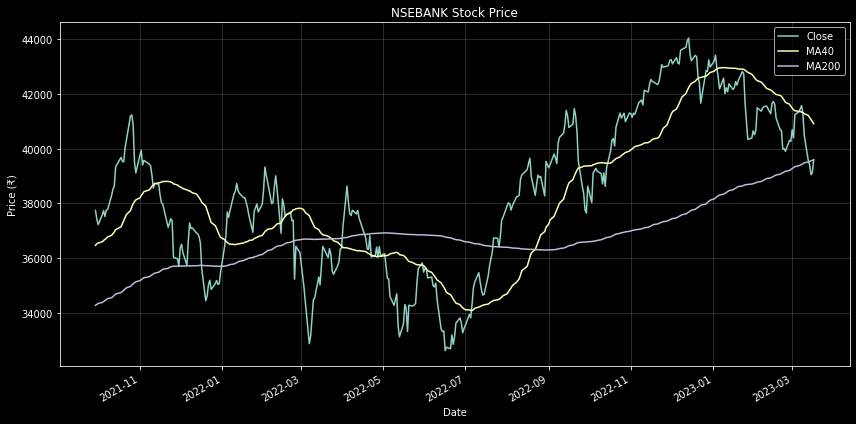

In [35]:
plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(12, 6))
nsebank['Close'].tail(365).plot(label='Close', ax=ax)
nsebank['MA40'].tail(365).plot(label='MA40', ax=ax)
nsebank['MA200'].tail(365).plot(label='MA200', ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Price (₹)')
ax.set_title('NSEBANK Stock Price')
ax.legend()
ax.grid(color='white', alpha=0.20)
plt.tight_layout()
plt.show()

The moving average is a technical indicator that is often used to identify trends in stock prices. A moving average is calculated by taking the average of a set number of consecutive closing prices. The 40-day moving average (MA40) and 200-day moving average (MA200) are commonly used time periods for moving averages.

When the MA40 is greater than the MA200, it is often interpreted as a bullish signal, indicating that the short-term trend of the stock price is upward. This is because the MA40 is more sensitive to recent price movements and therefore changes more quickly than the MA200. When the MA40 rises above the MA200, it suggests that the stock price has recently been rising faster than its longer-term trend, and that this upward momentum may continue for a while.

## 9. Trading Strategy

### Fast Signal & Slow Signal

The Fast Signal & Slow Signal strategy is a trading strategy that uses two moving averages to identify trends in the stock market. The fast signal is a short-term moving average, such as a 20-day or 40-day moving average, while the slow signal is a longer-term moving average, such as a 200-day moving average.

The basic idea behind the strategy is that when the fast signal is above the slow signal, it is a bullish signal, indicating that the stock price is trending upward. In this case, the trader might buy the stock. When the fast signal is below the slow signal, it is a bearish signal, indicating that the stock price is trending downward. In this case, the trader might sell the stock.

The Fast Signal & Slow Signal strategy is based on the idea that the long-term trend of the stock market is a good indicator of future price movements. By using the fast signal to identify short-term fluctuations in the stock price and the slow signal to identify the long-term trend, traders can make more informed decisions about when to buy and sell.

In [36]:
#Fast signal
nsebank['MA10'] = nsebank['Close'].rolling(10).mean()

In [37]:
#Slow signal
nsebank['MA50'] = nsebank['Close'].rolling(50).mean()

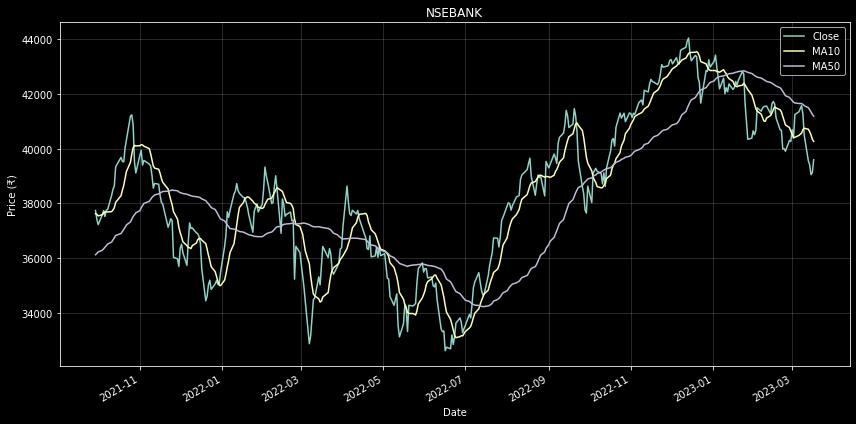

In [38]:
plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(12, 6))
nsebank['Close'].tail(365).plot(label='Close', ax=ax)
nsebank['MA10'].tail(365).plot(label='MA10', ax=ax)
nsebank['MA50'].tail(365).plot(label='MA50', ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Price (₹)')
ax.set_title('NSEBANK')
ax.legend()
ax.grid(color='white', alpha=0.20)
plt.tight_layout()
plt.show()

#### <font color = "red"> Long or Not

The decision to go long or not in a particular stock or market is a complex one that depends on many factors, including market conditions, economic indicators, and individual stock performance. It's not possible to make a blanket statement about whether or not it's a good idea to go long in the stock market.

A trading strategy such as the Fast Signal & Slow Signal strategy described above can provide some guidance on the direction of the market and help traders make informed decisions about when to buy and sell. However, it's important to consider multiple indicators and to understand the underlying economic and market conditions that are driving stock price

In [39]:
nsebank['Shares'] = [1 if nsebank.loc[ei, 'MA10']>nsebank.loc[ei, 'MA50'] else 0 for ei in nsebank.index]

In [40]:
nsebank.tail(365)

,Open,High,Low,Close,Adj Close,Volume,Price_shift_1,PriceDiff,Return,Direction,Moving_average_3days,MA40,MA200,MA10,MA50,Shares
Date,,,,,,,,,,,,,,,,
2021-09-29 00:00:00+05:30,37601.101562,37923.449219,37371.050781,37743.000000,37742.562500,260500,37425.101562,-317.898438,-0.008423,-1,37953.083333,36468.260156,34274.605176,37626.800000,36124.053047,1
2021-09-30 00:00:00+05:30,37677.800781,37884.851562,37354.250000,37425.101562,37424.667969,235100,37225.898438,-199.203125,-0.005323,-1,37704.367188,36523.701465,34310.421182,37602.450000,36170.971094,1
2021-10-01 00:00:00+05:30,37140.398438,37299.398438,36876.351562,37225.898438,37225.464844,189200,37579.648438,353.750000,0.009503,1,37464.666667,36553.647656,34343.003672,37543.844922,36227.180078,1
2021-10-04 00:00:00+05:30,37392.148438,37670.699219,37355.601562,37579.648438,37579.210938,146400,37741.000000,161.351562,0.004294,1,37410.216146,36597.270117,34378.350166,37587.239844,36285.227031,1
2021-10-05 00:00:00+05:30,37499.800781,37786.601562,37364.750000,37741.000000,37740.562500,153100,37521.550781,-219.449219,-0.005815,-1,37515.515625,36645.563867,34414.030918,37637.754687,36339.359062,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-13 00:00:00+05:30,40356.101562,40690.050781,39454.601562,39564.699219,39564.699219,174500,39411.398438,-153.300781,-0.003875,-1,40435.632812,41217.832520,39514.743682,40714.985156,41499.937031,0
2023-03-14 00:00:00+05:30,39522.398438,39768.500000,39132.601562,39411.398438,39411.398438,205700,39051.500000,-359.898438,-0.009132,-1,39820.515625,41143.836230,39540.103174,40625.414844,41428.436016,0
2023-03-15 00:00:00+05:30,39777.898438,39914.101562,38934.648438,39051.500000,39051.500000,164300,39132.601562,81.101562,0.002077,1,39342.532552,41065.934961,39559.886182,40503.659766,41345.403984,0


#### <font color="red">Daily profit

In [41]:
nsebank['Close_day1'] = nsebank['Close'].shift(-1)

In [42]:
nsebank.shape

(2183, 17)

In [43]:
nsebank.iloc[2132:2497,:]

,Open,High,Low,Close,Adj Close,Volume,Price_shift_1,PriceDiff,Return,Direction,Moving_average_3days,MA40,MA200,MA10,MA50,Shares,Close_day1
Date,,,,,,,,,,,,,,,,,
2023-01-04 00:00:00+05:30,43417.500000,43578.398438,42858.648438,42958.800781,42958.800781,216800,42608.699219,-350.101562,-0.008150,-1,43195.717448,42921.735059,38244.304189,42820.795312,42591.496016,1,42608.699219
2023-01-05 00:00:00+05:30,43073.050781,43137.550781,42298.601562,42608.699219,42608.699219,189100,42188.800781,-419.898438,-0.009855,-1,42997.583333,42942.372559,38278.606436,42819.870313,42617.572031,1,42188.800781
2023-01-06 00:00:00+05:30,42649.699219,42685.898438,41877.000000,42188.800781,42188.800781,195100,42582.750000,393.949219,0.009338,1,42585.433594,42956.998828,38307.407686,42797.870313,42638.893047,1,42582.750000
2023-01-09 00:00:00+05:30,42404.851562,42716.800781,42186.550781,42582.750000,42582.750000,161800,42014.750000,-568.000000,-0.013339,-1,42460.083333,42968.141309,38340.228936,42889.340234,42664.562031,1,42014.750000
2023-01-10 00:00:00+05:30,42642.000000,42674.250000,41835.750000,42014.750000,42014.750000,179300,42232.699219,217.949219,0.005187,1,42262.100260,42966.591309,38368.559932,42804.865234,42685.040000,1,42232.699219
2023-01-11 00:00:00+05:30,42071.851562,42318.000000,41729.000000,42232.699219,42232.699219,169800,42082.250000,-150.449219,-0.003562,-1,42276.733073,42963.091309,38398.986670,42745.365234,42703.536016,1,42082.250000
2023-01-12 00:00:00+05:30,42238.500000,42343.500000,41742.949219,42082.250000,42082.250000,154100,42371.250000,289.000000,0.006868,1,42109.899740,42951.765039,38431.762412,42628.355078,42719.390000,0,42371.250000
2023-01-13 00:00:00+05:30,42171.250000,42453.949219,41885.601562,42371.250000,42371.250000,205500,42167.550781,-203.699219,-0.004807,-1,42228.733073,42949.595020,38466.568154,42566.835156,42743.882031,0,42167.550781
2023-01-16 00:00:00+05:30,42622.500000,42715.648438,42066.550781,42167.550781,42167.550781,312300,42235.050781,67.500000,0.001601,1,42207.016927,42942.847559,38498.853408,42463.280078,42761.266016,0,42235.050781


In [44]:
nsebank['Profit'] = [nsebank.loc[ei, 'Close_day1']-nsebank.loc[ei, 'Close'] if nsebank.loc[ei, 'Shares']==1 else 0 for ei in nsebank.index]

In [45]:
nsebank

,Open,High,Low,Close,Adj Close,Volume,Price_shift_1,PriceDiff,Return,Direction,Moving_average_3days,MA40,MA200,MA10,MA50,Shares,Close_day1,Profit
Date,,,,,,,,,,,,,,,,,,
2013-03-18 00:00:00+05:30,11679.349609,11810.400391,11625.599609,11735.500000,11735.363281,0,11508.049805,-227.450195,-0.019381,-1,NaN,NaN,NaN,NaN,NaN,0,11508.049805,0.0
2013-03-19 00:00:00+05:30,11796.200195,11814.750000,11416.750000,11508.049805,11507.916016,0,11254.849609,-253.200195,-0.022002,-1,NaN,NaN,NaN,NaN,NaN,0,11254.849609,0.0
2013-03-20 00:00:00+05:30,11491.799805,11491.799805,11231.750000,11254.849609,11254.718750,0,11238.349609,-16.500000,-0.001466,-1,11499.466471,NaN,NaN,NaN,NaN,0,11238.349609,0.0
2013-03-21 00:00:00+05:30,11285.650391,11512.099609,11209.650391,11238.349609,11238.218750,0,11204.049805,-34.299805,-0.003052,-1,11333.749674,NaN,NaN,NaN,NaN,0,11204.049805,0.0
2013-03-22 00:00:00+05:30,11275.450195,11331.200195,11173.349609,11204.049805,11203.919922,0,11125.650391,-78.399414,-0.006997,-1,11232.416341,NaN,NaN,NaN,NaN,0,11125.650391,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-13 00:00:00+05:30,40356.101562,40690.050781,39454.601562,39564.699219,39564.699219,174500,39411.398438,-153.300781,-0.003875,-1,40435.632812,41217.832520,39514.743682,40714.985156,41499.937031,0,39411.398438,0.0
2023-03-14 00:00:00+05:30,39522.398438,39768.500000,39132.601562,39411.398438,39411.398438,205700,39051.500000,-359.898438,-0.009132,-1,39820.515625,41143.836230,39540.103174,40625.414844,41428.436016,0,39051.500000,0.0
2023-03-15 00:00:00+05:30,39777.898438,39914.101562,38934.648438,39051.500000,39051.500000,164300,39132.601562,81.101562,0.002077,1,39342.532552,41065.934961,39559.886182,40503.659766,41345.403984,0,39132.601562,0.0


Daily profit is equal to the close price of tomorrow minus close price of today. it value can be negative & positive. if negative, we lose money on that day. if shares equal to zero which mean we don't have stock at hand.

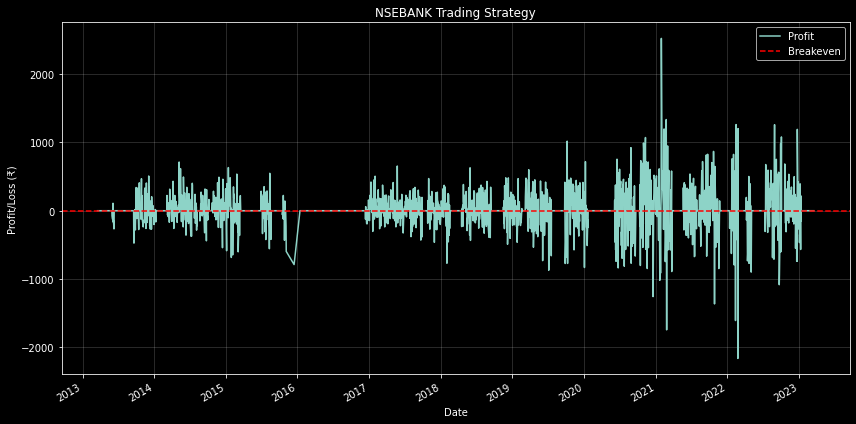

In [46]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))
nsebank['Profit'].plot(label='Profit', ax=ax)
ax.axhline(y=0, color='red', label='Breakeven', linestyle='--')
ax.set_xlabel('Date')
ax.set_ylabel('Profit/Loss (₹)')
ax.set_title('NSEBANK Trading Strategy')
ax.legend()
ax.grid(color='white', alpha=0.20)
plt.tight_layout()
plt.show()

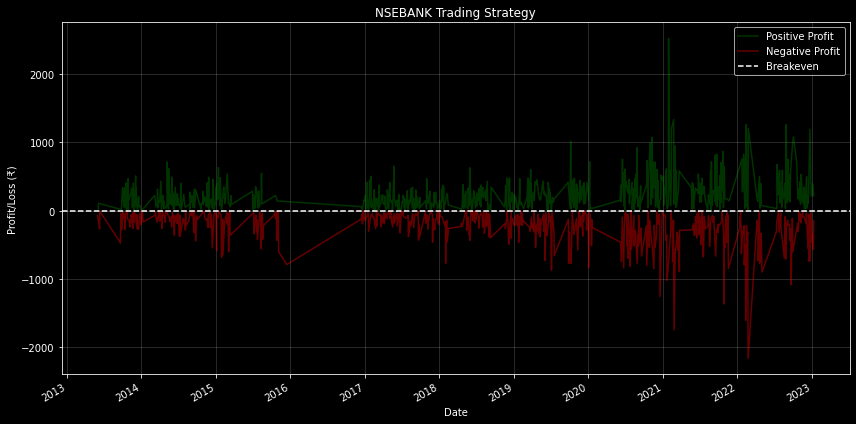

In [47]:
plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(12, 6))

pos_profit = nsebank.loc[nsebank['Profit'] > 0, 'Profit']
neg_profit = nsebank.loc[nsebank['Profit'] < 0, 'Profit']

pos_profit.plot(label='Positive Profit', color='green',alpha=0.40, ax=ax)
neg_profit.plot(label='Negative Profit', color='red',alpha=0.40, ax=ax)

ax.axhline(y=0, color='white', label='Breakeven', linestyle='--')
ax.set_xlabel('Date')
ax.set_ylabel('Profit/Loss (₹)')
ax.set_title('NSEBANK Trading Strategy')
ax.legend()
ax.grid(color='white', alpha=0.20)
plt.tight_layout()
plt.show()


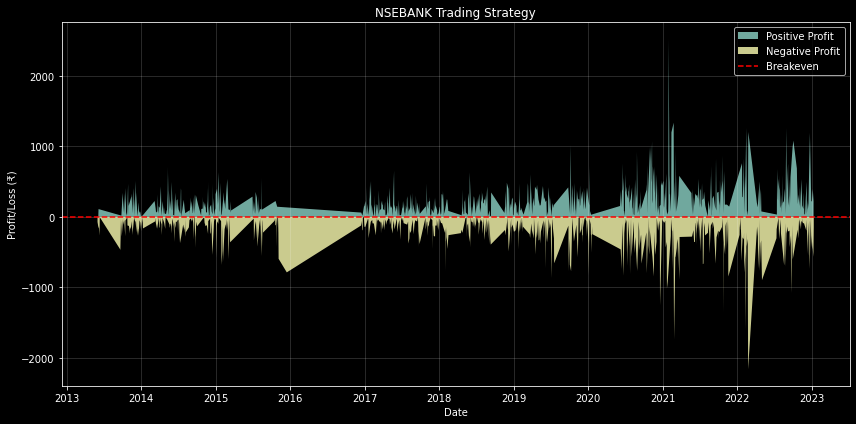

In [48]:
plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(12, 6))

pos_profit = nsebank.loc[nsebank['Profit'] > 0, 'Profit']
neg_profit = nsebank.loc[nsebank['Profit'] < 0, 'Profit']

ax.fill_between(pos_profit.index, pos_profit, 0.05, alpha=0.8, label='Positive Profit')
ax.fill_between(neg_profit.index, neg_profit, -0.05, alpha=0.8, label='Negative Profit')

ax.axhline(y=0, color='red', label='Breakeven', linestyle='--')
ax.set_xlabel('Date')
ax.set_ylabel('Profit/Loss (₹)')
ax.set_title('NSEBANK Trading Strategy')
ax.legend()
ax.grid(color='white', alpha=0.20)
plt.tight_layout()
plt.show()

### Cumulative Wealth

In [49]:
nsebank['ITD'] = nsebank['Profit'].cumsum()

In [50]:
nsebank.tail()

,Open,High,Low,Close,Adj Close,Volume,Price_shift_1,PriceDiff,Return,Direction,Moving_average_3days,MA40,MA200,MA10,MA50,Shares,Close_day1,Profit,ITD
Date,,,,,,,,,,,,,,,,,,,
2023-03-13 00:00:00+05:30,40356.101562,40690.050781,39454.601562,39564.699219,39564.699219,174500,39411.398438,-153.300781,-0.003875,-1,40435.632812,41217.832520,39514.743682,40714.985156,41499.937031,0,39411.398438,0.0,21429.793945
2023-03-14 00:00:00+05:30,39522.398438,39768.500000,39132.601562,39411.398438,39411.398438,205700,39051.500000,-359.898438,-0.009132,-1,39820.515625,41143.836230,39540.103174,40625.414844,41428.436016,0,39051.500000,0.0,21429.793945
2023-03-15 00:00:00+05:30,39777.898438,39914.101562,38934.648438,39051.500000,39051.500000,164300,39132.601562,81.101562,0.002077,1,39342.532552,41065.934961,39559.886182,40503.659766,41345.403984,0,39132.601562,0.0,21429.793945
2023-03-16 00:00:00+05:30,39061.699219,39381.398438,38613.148438,39132.601562,39132.601562,196300,39598.101562,465.500000,0.011895,1,39198.500000,40988.373730,39577.482686,40347.105078,41259.551016,0,39598.101562,0.0,21429.793945
2023-03-17 00:00:00+05:30,39442.398438,39705.148438,38926.800781,39598.101562,39598.101562,173400,NaN,NaN,NaN,-1,39260.734375,40916.876270,39596.338447,40267.935156,41192.337031,0,NaN,0.0,21429.793945


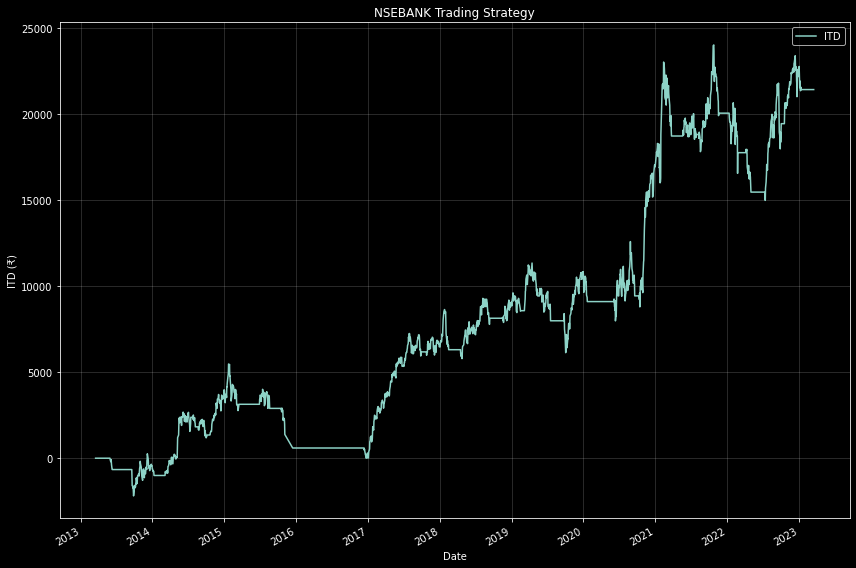

In [54]:
plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(12, 8))

nsebank['ITD'].plot(label='ITD', ax=ax)

ax.set_xlabel('Date')
ax.set_ylabel('ITD (₹)')
ax.set_title('NSEBANK Trading Strategy')
ax.legend()
ax.grid(color='white', alpha=0.20)
plt.tight_layout()
plt.show()